### Logistic Regression Work
Used logistic Regression to explore data and create a benchmark model
1. Created model without oversampling
2. Created model with oversampling
    - Class imbalance just on edge of potentially being problematic. Negative class represents 73% of the data. Typically problematic at 80%
    - Addressed Class Imbalance with Oversampling to gain experience with the process.
3. Compared the Key Metrics for each model: ROC AUC, Recall
4. Reviwed Confusion matrix (default threshold) for each model. 
    - With oversampling recall score greatly improved 
    - With oversampling more customers were being correctly identified as churning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ipywidgets import interactive, FloatSlider

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve

import imblearn.over_sampling

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science Projects/Churn Project/Models/chatr_clean.csv')

In [3]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber,InternetService_No,Contract_One_Year,Contract_Two_year,PaymentMethod_Crcard,...,DeviceProtection_No_internet_serv,DeviceProtection_Yes,TechSupport_No_internet_serv,TechSupport_Yes,StreamingTV_No_internet_serv,StreamingTV_Yes,StreamingMovies_No_internet_serv,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1.0,29.85,29.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34.0,56.95,1889.50,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2.0,53.85,108.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,7795-CFOCW,0,45.0,42.30,1840.75,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2.0,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
#data.info()

In [5]:
data.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber', 'InternetService_No',
       'Contract_One_Year', 'Contract_Two_year', 'PaymentMethod_Crcard',
       'PaymentMethod_Electr_Check', 'PaymentMethod_Mailed_check',
       'MultipleLines_No_phone_serv', 'MultipleLines_Yes', 'Dependents_Yes',
       'gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No_internet_serv', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Serv', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_serv', 'DeviceProtection_Yes',
       'TechSupport_No_internet_serv', 'TechSupport_Yes',
       'StreamingTV_No_internet_serv', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_serv', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes'],
      dtype='object')

### Model Setup

In [6]:
y = data['Churn_Yes']
X = data.drop(['Churn_Yes', 'customerID'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

# fit logistic regression to training data
pipe.fit(X_train, y_train)  

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 30)
(1758, 30)
(5274,)
(1758,)


### Churn Target Column
27% churn

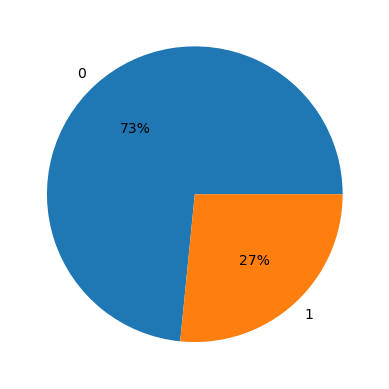

In [8]:
unique, counts = np.unique(y, return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%');

### Churn on Test + Train Data
- parity in test and train
- 1 to 3 ratio (26% have a one / 74% zero)

In [9]:
np.mean(y_train)

0.26753886992794845

In [10]:
np.mean(y_test)

0.2605233219567691

### ROC AUC
How well does the model classify observations

In [11]:
y_pred = pipe.predict_proba(X_test)[:,1] #soft class predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

ROC AUC score =  0.8344776620759153


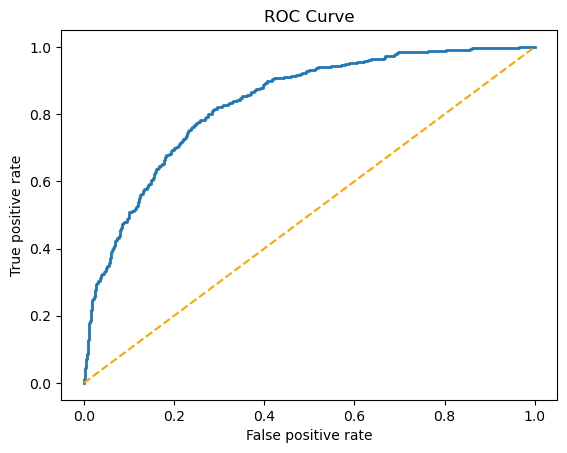

In [12]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='orange',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred))
#plt.savefig('ROC Curve.png', dpi=300) 

#### Hard Class Predictions (No Oversample Train Data)
Predict Churn / Not Churn

In [13]:
y_pred = pipe.predict(X_test)

#### Results for No Oversample Train Data


In [14]:
print("Default treshold:")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Default treshold:
Precision: 0.6139896373056994
Recall: 0.517467248908297
F1: 0.5616113744075829


### Coefficient For Each Feature 
- Which features are strongly associated with churn and not churning?

#### Coeffcients in Log Odds Units

In [15]:
#.T to transform cuz there was a shape error
coefs_tst_data = pd.DataFrame(pipe['LogReg'].coef_.T, X.columns, columns = ['Coeff_Log_Odds'])

In [16]:
coefs_tst_data.sort_values(by='Coeff_Log_Odds', ascending = False)

,Coeff_Log_Odds
TotalCharges,0.746655
InternetService_Fiber,0.600124
StreamingMovies_Yes,0.195780
StreamingTV_Yes,0.173457
MultipleLines_Yes,0.131167
PaymentMethod_Electr_Check,0.123118
PaperlessBilling_Yes,0.114826
SeniorCitizen,0.090125
Partner_Yes,0.047038
MultipleLines_No_phone_serv,0.042894


#### Get Aboslute Values of Coeff_Log_Odds
- Feature Importance contains signal. It's just as important to say a feature indicates positive class as it is to say it indicates negative class. 

In [17]:
#new column with values of Coeff_Log_Odds
coefs_tst_data['abs_Coeff'] = coefs_tst_data.loc[:, 'Coeff_Log_Odds']
#make column absolute values
coefs_tst_data['abs_Coeff'] = coefs_tst_data['abs_Coeff'].abs()

In [18]:
coefs_tst_data.sort_values(by='abs_Coeff', ascending = False)

,Coeff_Log_Odds,abs_Coeff
tenure,-1.502647,1.502647
TotalCharges,0.746655,0.746655
InternetService_Fiber,0.600124,0.600124
Contract_Two_year,-0.582751,0.582751
MonthlyCharges,-0.477732,0.477732
Contract_One_Year,-0.318596,0.318596
StreamingMovies_Yes,0.195780,0.195780
StreamingTV_Yes,0.173457,0.173457
OnlineSecurity_Yes,-0.160019,0.160019
TechSupport_Yes,-0.138082,0.138082


#### Chart top 15 important based on absolute values
- Reflect features with strong signal for both churn and not churn 

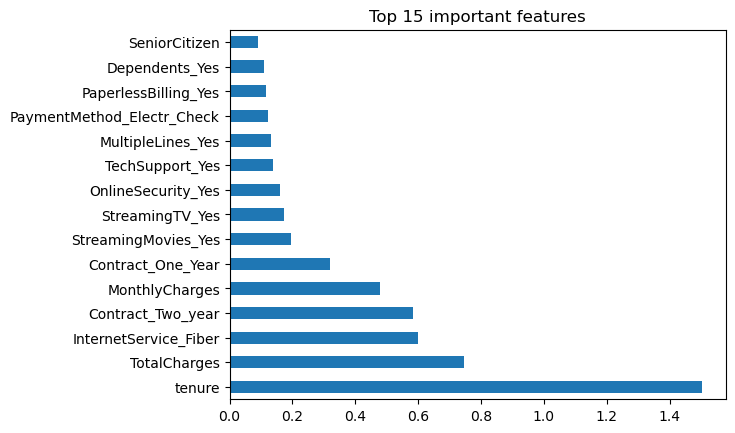

In [19]:
# gets column names
imp_features = pd.Series(coefs_tst_data.abs_Coeff, index=X.columns)
imp_features.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
#plt.savefig("LogReg_FeaturesImg.png", format="png", dpi=300)
plt.show()

### Oversampled Model

#### Setup Oversampling on the Training Data
- Only oversample training dataset. 
- Validation and test sets still represent the same type of data we'd see in real world. 
    - Validation and test data should still have the same majority/minority ratio that you would expect to actually find in practice.

- Used 3x positive samples. Rationale: We have 3 to 1 ratio of negative to positive observations.

In [20]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 3, 0 : n_neg} 

# randomly oversample positive samples
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 

#use the fit_sample method to create the dataset with a desired proportion
#the variables X_tr_oversample, y_tr_oversample hold training data with extra samples just created
X_tr_oversample, y_tr_oversample = ROS.fit_resample(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (4233) in class 1 will be larger than the number of samples in the majority class (class #0 -> 3863)
  warnings.warn(


#### Setup Oversample model 

In [21]:
#instantiate logistic regression model with Pipeline
pipe_oversample = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

In [22]:
print(type(pipe_oversample))

<class 'sklearn.pipeline.Pipeline'>


#### Fit model on the oversampled training data

In [23]:
pipe_oversample.fit(X_tr_oversample, y_tr_oversample)

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

#### Hard Class Predictions on Oversampling -  results are on the test data

In [24]:
y_pred_oversample = pipe_oversample.predict(X_test)
y_pred_oversample

array([0, 0, 1, ..., 1, 1, 0])

#### Soft Class Predictions on Oversample

In [25]:
y_prob_train = pipe_oversample.predict_proba(X_test)
y_prob_test = pipe_oversample.predict_proba(X_train)

#### AUC On Oversampled Train data - results are on the test set

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_oversample)
auc_oversamp = round(metrics.roc_auc_score(y_test, y_pred_oversample), 4)

In [27]:
auc_oversamp

0.7494

#### Metrics Oversampled Train Data - results are on the test set

In [28]:
print("Default threshold:")
print(f"Precision: {precision_score(y_test, y_pred_oversample)}")
print(f"Recall: {recall_score(y_test, y_pred_oversample)}")
print(f"F1: {f1_score(y_test, y_pred_oversample)}")

Default threshold:
Precision: 0.48046875
Recall: 0.8056768558951966
F1: 0.601957585644372


#### Coeffcients in Log Odds Units on Oversampled Training Data

In [29]:
coefs_tst_data2 = pd.DataFrame(pipe_oversample['LogReg'].coef_.T, X.columns, columns = ['Coeff_Log_Odds_Oversamp'])

In [30]:
coefs_tst_data2.sort_values(by='Coeff_Log_Odds_Oversamp', ascending = False)

,Coeff_Log_Odds_Oversamp
InternetService_Fiber,0.845664
TotalCharges,0.677032
StreamingMovies_Yes,0.311271
StreamingTV_Yes,0.289141
PaymentMethod_Electr_Check,0.185143
MultipleLines_Yes,0.165019
SeniorCitizen,0.086180
PaperlessBilling_Yes,0.079371
Partner_Yes,0.058196
PhoneService_Yes,0.046049


In [31]:
#new column with values of Coeff_Log_Odds
coefs_tst_data2['abs_Coeff'] = coefs_tst_data2.loc[:, 'Coeff_Log_Odds_Oversamp']
#make column absolute values
coefs_tst_data2['abs_Coeff'] = coefs_tst_data2['abs_Coeff'].abs()

In [32]:
coefs_tst_data2.sort_values(by='abs_Coeff', ascending = False)

,Coeff_Log_Odds_Oversamp,abs_Coeff
tenure,-1.347771,1.347771
MonthlyCharges,-1.156890,1.156890
InternetService_Fiber,0.845664,0.845664
TotalCharges,0.677032,0.677032
Contract_Two_year,-0.540970,0.540970
StreamingMovies_Yes,0.311271,0.311271
StreamingTV_Yes,0.289141,0.289141
Contract_One_Year,-0.286372,0.286372
PaymentMethod_Electr_Check,0.185143,0.185143
MultipleLines_Yes,0.165019,0.165019
